In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno # library to visualize missing values
import seaborn as sns # library for statistical data visualization

In [2]:
"""Read dataset"""
data = pd.read_csv('recipes.csv', encoding = 'latin1')
data.head()

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize(L),BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp(C),PrimingMethod,PrimingAmount
0,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
1,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
4,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73797 entries, 0 to 73796
Data columns (total 19 columns):
Style             73797 non-null object
StyleID           73797 non-null int64
Size(L)           73797 non-null float64
OG                73797 non-null float64
FG                73797 non-null float64
ABV               73797 non-null float64
IBU               73797 non-null float64
Color             73797 non-null float64
BoilSize(L)       73797 non-null float64
BoilTime          73797 non-null int64
BoilGravity       70807 non-null float64
Efficiency        73797 non-null float64
MashThickness     43957 non-null float64
SugarScale        73797 non-null object
BrewMethod        73797 non-null object
PitchRate         34583 non-null float64
PrimaryTemp(C)    51165 non-null float64
PrimingMethod     6759 non-null object
PrimingAmount     4770 non-null object
dtypes: float64(12), int64(2), object(5)
memory usage: 10.7+ MB
None


In [4]:
"""Check for NaN"""
print("Rows in dataset %d" % data.size)
print(data.isnull().sum())

Rows in dataset 1402143
Style                 0
StyleID               0
Size(L)               0
OG                    0
FG                    0
ABV                   0
IBU                   0
Color                 0
BoilSize(L)           0
BoilTime              0
BoilGravity        2990
Efficiency            0
MashThickness     29840
SugarScale            0
BrewMethod            0
PitchRate         39214
PrimaryTemp(C)    22632
PrimingMethod     67038
PrimingAmount     69027
dtype: int64


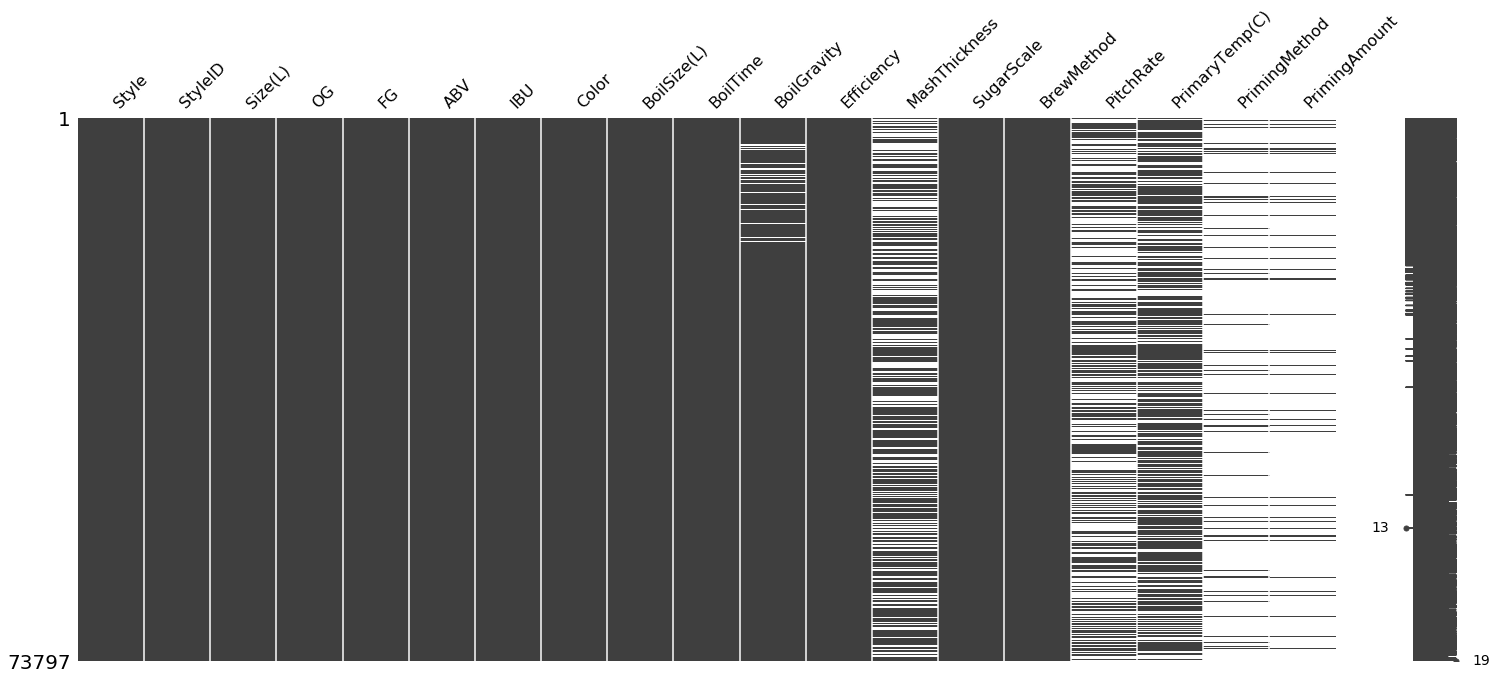

In [5]:
%matplotlib inline
msno.matrix(data)

Number of distinct types = 176


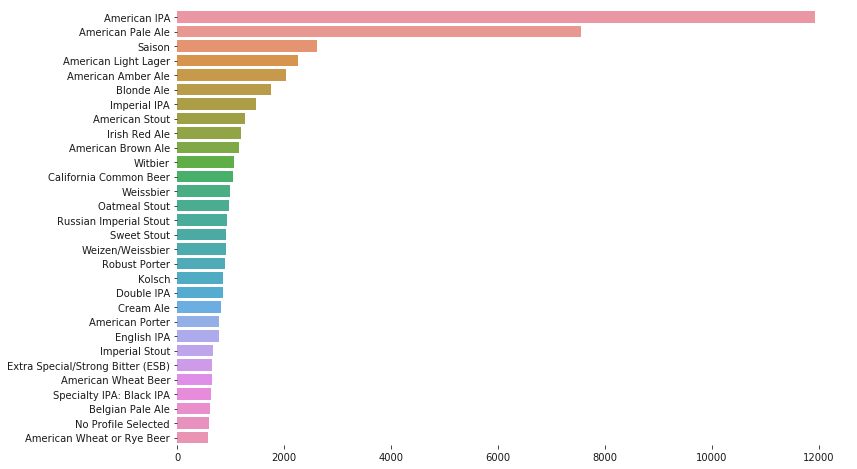

In [6]:
"""Unique labels (Style and StyleID)"""
styles = data['Style'].unique()
assert(styles.size == data['StyleID'].unique().size)
print("Number of distinct types = %d" % styles.size)
freq = {}
for style in styles:
    freq[style] = (sum(data['Style'] == style))
    #print("Style = %s, times = %d" % (style, freq[style]))

def draw_bar_chart(n, freq):
    import operator
    x = []
    y = []
    sorted_dict = sorted(freq.items(), key = operator.itemgetter(1), reverse = True)
    
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(12, 8))
    
    sns.set_color_codes("pastel")
    x = [t[1] for t in sorted_dict[:n]]
    y = [t[0] for t in sorted_dict[:n]]
    sns.barplot(x=x, y=y)
    sns.despine(left=True, bottom=True)
    plt.show()
    
draw_bar_chart(30, freq)

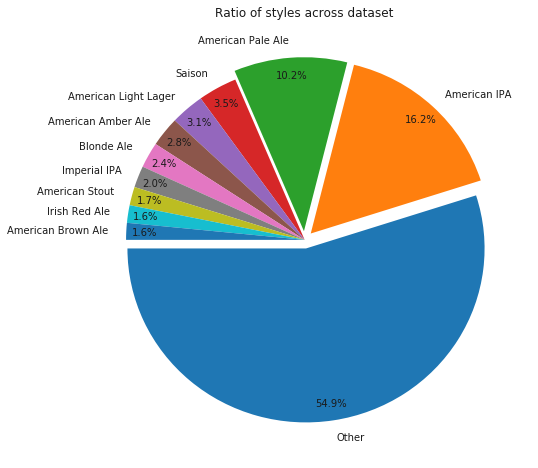

In [39]:
style_cnt = data.loc[:,['Style','PrimingMethod']]
style_cnt['NullPriming'] = style_cnt['PrimingMethod'].isnull()
style_cnt['Count'] = 1
style_cnt_grp = style_cnt.loc[:,['Style','Count','NullPriming']].groupby('Style').sum()

style_cnt_grp = style_cnt_grp.sort_values('NullPriming', ascending=False)
style_cnt_grp.reset_index(inplace=True)

top10_style = list(style_cnt_grp['Style'][:10].values)

# Group by current count information computed earlier and group every style not in top20 together
style_cnt_other = style_cnt_grp.loc[:, ['Style','Count']]
style_cnt_other.Style = style_cnt_grp.Style.apply(lambda x: x if x in top10_style else 'Other')
style_cnt_other = style_cnt_other.groupby('Style').sum()

# Get ratio of each style
style_cnt_other['Ratio'] = style_cnt_other.Count.apply(lambda x: x/float(len(data)))
style_cnt_other = style_cnt_other.sort_values('Count', ascending=False)

f, ax = plt.subplots(figsize=(8, 8))
explode = (0.05, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(x=style_cnt_other['Ratio'], labels=list(style_cnt_other.index), startangle = 180, autopct='%1.1f%%', pctdistance= .9, explode=explode)
plt.title('Ratio of styles across dataset')
plt.show()

# Categorial Features

In [7]:
"""List of categorial features"""
print(list(data.select_dtypes(include=object).columns))

['Style', 'SugarScale', 'BrewMethod', 'PrimingMethod', 'PrimingAmount']


In [8]:
"""Priming Amount"""
print(data.PrimingAmount.unique())

['4.5 oz' nan '6-7 g sukker/l' ..., '36 hours' '.5 gal'
 '4.79oz for 6gal  4.5oz for 5.75  4.32 for 5.5gal  4.12oz for 5.25gal  3.93oz for 5 gal.']


SugarScale has 0 null values


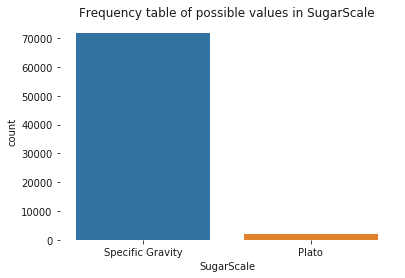

In [9]:
"""SugarScale"""
ax = sns.countplot(x='SugarScale', data=data)
ax.set(title='Frequency table of possible values in SugarScale')
sns.despine(left=True, bottom=True)

print('SugarScale has {} null values'.format(data.SugarScale.isnull().sum()))

BrewMethod has 0 null values


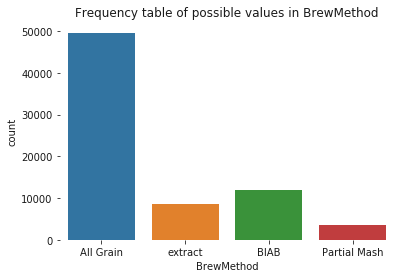

In [10]:
"""Brew method"""
ax = sns.countplot(x='BrewMethod', data=data)
ax.set(title='Frequency table of possible values in BrewMethod')
sns.despine(left=True, bottom=True)

print('BrewMethod has {} null values'.format(data.BrewMethod.isnull().sum()))

In [11]:
"""PrimingMethod"""

print('PrimingMethod has {} unique values'.format(data.PrimingMethod.nunique()))
print(data.PrimingMethod.unique()[:20])
print('PrimingMethod has {} null values'.format(data.PrimingMethod.isnull().sum()))

PrimingMethod has 870 unique values
['corn sugar' nan 'Sukkerlake' 'Corn Sugar' 'Priming Sugar'
 'Keg - Force Carb.' 'Force Carb' 'Force carb' 'Forced Carbonation'
 'DME boiled in 2 cups water' 'force carb' 'Dextrose' 'Sukker' 'Sugar'
 'FORCED CARB' 'Inverted sugar' 'honey' 'CO2' 'Add in last 5 of boil'
 'priming sugar']
PrimingMethod has 67038 null values


# Numerical Features

In [16]:
"""
List of numerical features
"""
numerical_features = list(data.select_dtypes(exclude=object))
print(numerical_features)
numerical_features = numerical_features[1:] #deleting 'StyleID'

['StyleID', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize(L)', 'BoilTime', 'BoilGravity', 'Efficiency', 'MashThickness', 'PitchRate', 'PrimaryTemp(C)']


In [17]:
data.loc[:, numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Size(L),73797.0,43.898647,180.365456,1.000,18.930,20.820,23.660,9200.0000
OG,73797.0,1.406755,2.198889,1.000,1.051,1.058,1.069,34.0345
FG,73797.0,1.075944,0.432707,-0.003,1.011,1.013,1.017,23.4246
ABV,73797.0,6.137404,1.883420,0.000,5.080,5.790,6.830,54.7200
IBU,73797.0,44.283629,42.985209,0.000,23.370,35.770,56.410,3409.3000
Color,73797.0,13.414279,11.947259,0.000,5.170,8.440,16.810,186.0000
BoilSize(L),73797.0,49.688786,193.231047,1.000,20.820,27.440,30.000,9700.0000
BoilTime,73797.0,65.078594,15.027206,0.000,60.000,60.000,60.000,240.0000
BoilGravity,70807.0,1.354376,1.932547,0.000,1.040,1.047,1.060,52.6000
Efficiency,73797.0,66.354955,14.093935,0.000,65.000,70.000,75.000,100.0000


In [43]:
"""Box plots"""
vlow_scale_feats = ['PitchRate']
low_scale_feats = ['ABV', 'MashThickness', 'PrimaryTemp(C)']
mid_scale_feats = ['Color', 'BoilTime', 'Efficiency']
high_scale_feats = ['IBU', 'Size(L)']

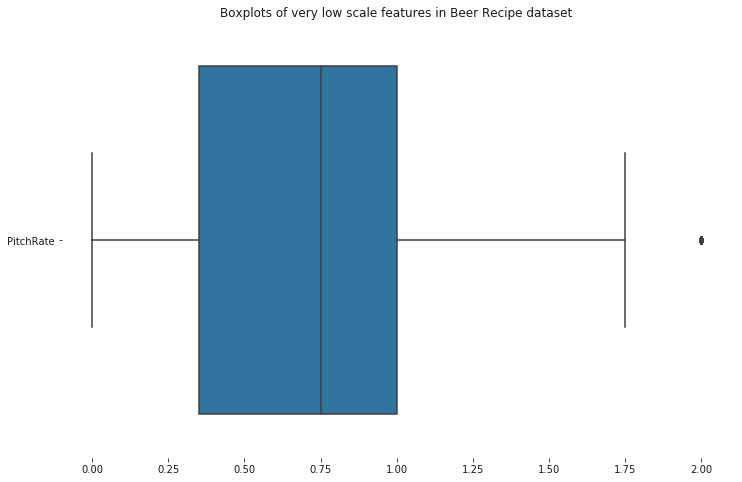

In [44]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=data.loc[:, vlow_scale_feats], orient='h')
ax.set(title='Boxplots of very low scale features in Beer Recipe dataset')
sns.despine(left=True, bottom=True)

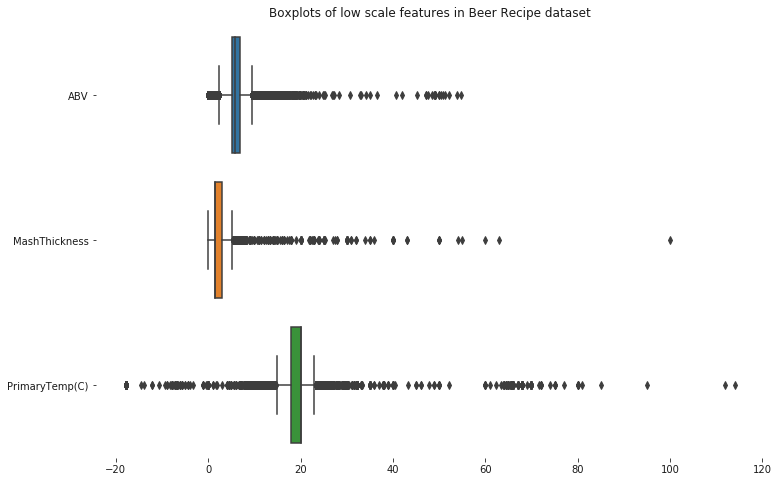

In [45]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=data.loc[:, low_scale_feats], orient='h')
ax.set(title='Boxplots of low scale features in Beer Recipe dataset')
sns.despine(left=True, bottom=True)

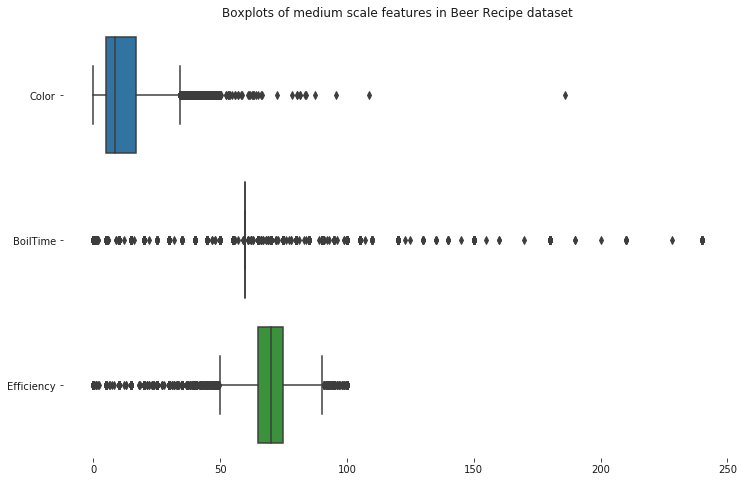

In [46]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=data.loc[:, mid_scale_feats], orient='h')
ax.set(title='Boxplots of medium scale features in Beer Recipe dataset')
sns.despine(left=True, bottom=True)

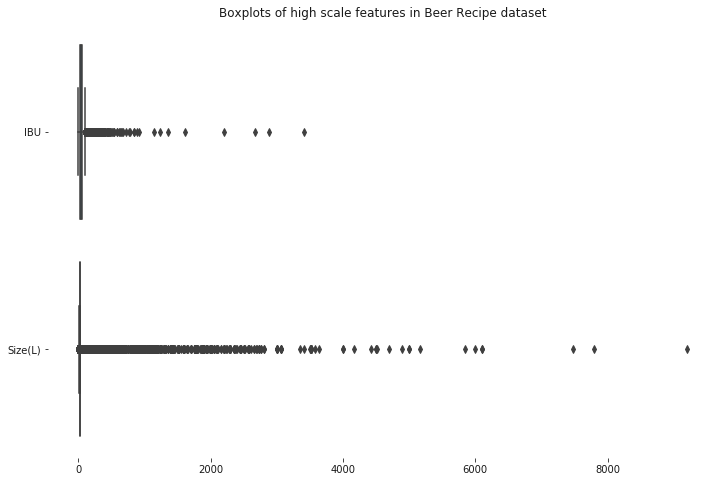

In [47]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=data.reindex(columns = high_scale_feats), orient='h')
ax.set(title='Boxplots of high scale features in Beer Recipe dataset')
sns.despine(left=True, bottom=True)

# Classifiers

In [50]:
# imports
from sklearn.preprocessing import LabelEncoder, Imputer
from sklearn.model_selection import train_test_split

# Get only the features to be used from original dataset
features_list= ['StyleID', #target
                'ABV','IBU','Color', #standardized fields
                'SugarScale', 'BrewMethod', #categorical features
                'Size(L)', 'BoilTime', 'Efficiency', 'MashThickness', 'PitchRate', 'PrimaryTemp(C)' # other numerical features
                ]

clf_data = data.loc[:, features_list]

# Label encoding
cat_feats_to_use = list(clf_data.select_dtypes(include=object).columns)
for feat in cat_feats_to_use:
    encoder = LabelEncoder()
    clf_data[feat] = encoder.fit_transform(clf_data[feat])

# Fill null values
num_feats_to_use = list(clf_data.select_dtypes(exclude=object).columns)
for feat in num_feats_to_use:
    imputer = Imputer(strategy='median')
    clf_data[feat] = imputer.fit_transform(clf_data[feat].values.reshape(-1,1))
    
# Seperate Targets from Features
X = clf_data.iloc[:, 1:]
y = clf_data.iloc[:, 0] #the target were the first column I included

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=35)

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73797 entries, 0 to 73796
Data columns (total 11 columns):
ABV               73797 non-null float64
IBU               73797 non-null float64
Color             73797 non-null float64
SugarScale        73797 non-null float64
BrewMethod        73797 non-null float64
Size(L)           73797 non-null float64
BoilTime          73797 non-null float64
Efficiency        73797 non-null float64
MashThickness     73797 non-null float64
PitchRate         73797 non-null float64
PrimaryTemp(C)    73797 non-null float64
dtypes: float64(11)
memory usage: 6.2 MB


In [52]:
"""
Scaling
"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training classifiers

In [70]:
"""
Training classifiers
"""

clf = {}

In [72]:
"""
LogisticRegression
"""
from sklearn.linear_model import LogisticRegression

clf['LogisticRegression'] = LogisticRegression()
clf['LogisticRegression'].fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
"""
Random forest
"""
from sklearn.ensemble import RandomForestClassifier

clf['Random forest'] = RandomForestClassifier()
clf['Random forest'].fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
"""
MLP
"""
from sklearn.neural_network import MLPClassifier

clf['MLP'] = MLPClassifier(
                hidden_layer_sizes=(50, 10),
                activation='relu',
                alpha=0.05,
                learning_rate = 'adaptive')
clf['MLP'].fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 10), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [76]:
"""
Print accuraces on test data
"""
from sklearn.metrics import accuracy_score

for cl in clf.keys():
    y_pred = clf[cl].predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(cl + ' accuracy: {}'.format(score))

Random forest accuracy: 0.32594850948509485
MLP accuracy: 0.35047425474254745
LogisticRegression accuracy: 0.21558265582655828
